# Error Attribution

This notebook is for summarizing error type distribution. And make plots on paper.

In [66]:
from pathlib import Path

res_file = Path("/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs/result/error-attribution/error_attribution.jsonl")

import pandas as pd

data = pd.read_json(res_file, lines=True)

In [67]:
data.head()

,scene,pair,tx,ty,tz,theta,phi,psi,tx_text,ty_text,...,hash_id,pred_val,label_val,is_valid,distance,angle,tau,num_of_ref_obj,ref_obj,error_type
0,scene0789_00,000671-000690,-0.078962,-0.035289,0.410650,1.217677,0.165456,1.330545,left,up,...,None,NaN,NaN,NaN,NaN,NaN,NaN,2,"[hallway, details on the walls]","[PE, SRE]"
1,None,009358-009373,0.144591,-0.050708,0.415012,-3.263284,4.765806,1.751698,right,up,...,578511c8a9,NaN,NaN,NaN,NaN,NaN,NaN,1,[objects],[SRE]
2,scene0783_00,001519-001546,0.041767,0.039552,0.408483,-0.962937,-1.202116,2.628469,right,down,...,None,NaN,NaN,NaN,NaN,NaN,NaN,1,[view of the scene],[PE]
3,scene0709_00,000450-000478,0.058965,-0.077797,0.407738,-1.108655,3.592630,-2.971862,right,up,...,None,NaN,NaN,NaN,NaN,NaN,NaN,1,[objects],[SRE]
4,scene0709_00,000450-000478,0.058965,-0.077797,0.407738,-1.108655,3.592630,-2.971862,right,up,...,None,NaN,NaN,NaN,NaN,NaN,NaN,1,[objects],[SRE]


In [68]:
data["num_of_ref_obj"].value_counts()

num_of_ref_obj
1    64
2    49
3     6
0     1
Name: count, dtype: int64

In [69]:
data.explode("ref_obj")["ref_obj"].value_counts()

ref_obj
objects              29
chair                12
desk                  9
chairs                8
chessboard            7
                     ..
shower curtain        1
rack with bottles     1
printer               1
boxes                 1
sink                  1
Name: count, Length: 81, dtype: int64

In [70]:
exploded_data = data.explode("error_type")

exploded_data["error_type"] = pd.Categorical(exploded_data["error_type"], categories=["PE", "SRE", "LRE", "PTE"], ordered=True)
legend_map = {
    "PE": "Perception Error",
    "SRE": "Spatial Relation Error",
    "LRE": "Logical Reasoning Error",
    "PTE": "Pespective Transformation Error",
}
exploded_data["error_type"] = exploded_data["error_type"].map(legend_map)

exploded_data["eval_metric"] = pd.Categorical(exploded_data["eval_metric"], categories=["theta", "phi", "psi", "tx", "ty", "tz"], ordered=True)
dof_map = {
    "theta": "$\\theta$",
    "phi": "$\phi$",
    "psi": "$\psi$",
    "tx": "$t_x$",
    "ty": "$t_y$",
    "tz": "$t_z$",
}
exploded_data["eval_metric"] = exploded_data["eval_metric"].map(dof_map)

<Axes: ylabel='count'>

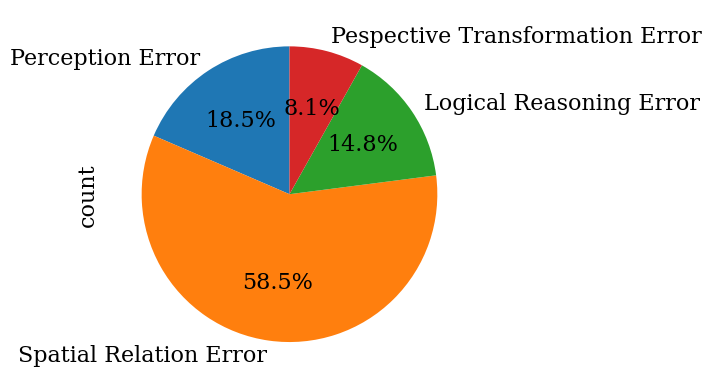

In [71]:
exploded_data["error_type"].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90)

/local/user/1483801110/ipykernel_29846/840049550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = exploded_data.groupby(["eval_metric", "error_type"]).size().unstack(fill_value=0)


<Axes: ylabel='eval_metric'>

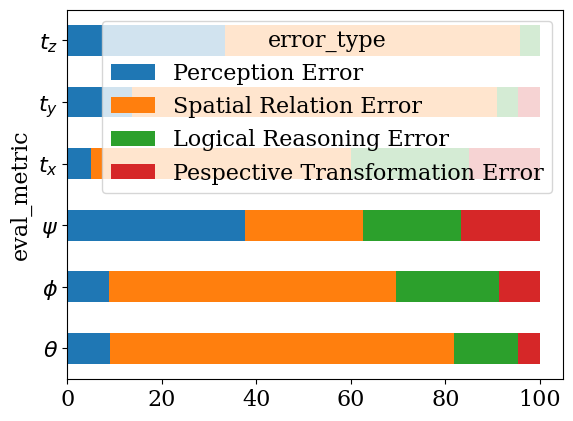

In [72]:
group_data = exploded_data.groupby(["eval_metric", "error_type"]).size().unstack(fill_value=0)
stack_bar_data = group_data.div(group_data.sum(axis=1), axis=0) * 100
stack_bar_data.plot(kind="barh", stacked=True)

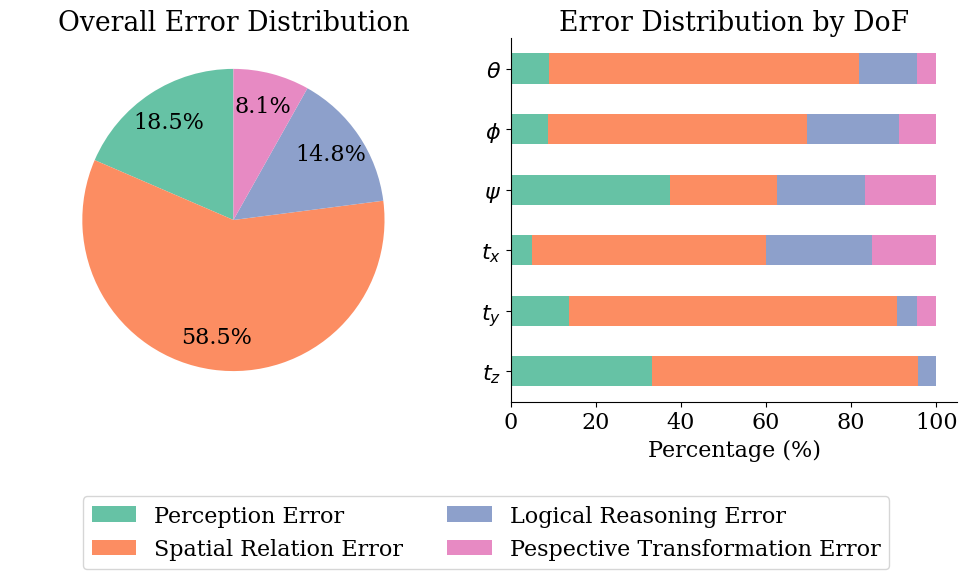

In [73]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'DejaVu Serif'
rcParams['font.size'] = 16

colors = plt.cm.Set2.colors

# 创建一个包含两个子图的图表
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1]})

stack_bar_data.plot(kind="barh", stacked=True, ax=ax1, color=colors[:len(stack_bar_data.columns)])
ax1.set_xlabel('Percentage (%)')
ax1.set_title('Error Distribution by DoF')
ax1.set_ylabel("")
ax1.get_legend().set_visible(False)
ax1.invert_yaxis()
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
#         colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

exploded_data["error_type"].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax2, labels=None, colors=colors[:len(exploded_data["error_type"].value_counts())], pctdistance=.78)
ax2.axis('equal')
ax2.set_title('Overall Error Distribution')
ax2.set_ylabel("")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)

# 调整布局，避免图形重叠 
plt.tight_layout()
plt.savefig("/home/u5u/kdeng.u5u/spatial-reasoning-of-LMs/result/error-attribution/error-dist.pdf", dpi=200, bbox_inches='tight')

plt.show()

## Test Font Family

In [74]:
import matplotlib
from IPython.core.display import HTML

fonts = []
for i in matplotlib.font_manager.fontManager.ttflist:
    fonts.append(i.name)

for f in sorted(set(fonts)):
    display(HTML( "<span style='font-family: {font}; font-size: 17px'> {font}</span>".format(font=f) ))